In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

blob_centers = np.array(
[[0.2, 2.3],
 [-1.5, 2.3],
 [-2.8, 1.8],
 [-2.8, 2.8],
 [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

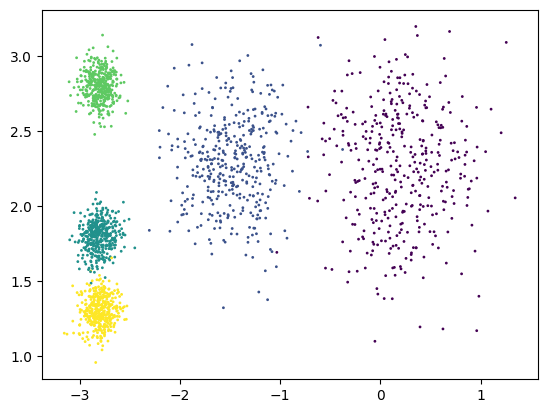

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=1)    

In [44]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_predict = kmeans.fit_predict(X)
print(y_predict)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 2 3 1 0 0 4 3 4 2 1 1 3 2 2 3 3 4 1 0 4 0 3 1 0 3 0 4 2 0 4 1 3 1 1 2 4
 2 0 4 3 0 3 3 1 0 4 0 1 0 0 4 0 0 1 0 4 2 2 1 0 4 0 2 2 1 1 2 0 1 0 4 1 1
 1 1 1 2 3 4 2 2 3 1 1 2 4 4 4 0 2 4 4 1 0 2 3 2 2 3 1 0 4 2 4 3 0 4 3 0 3
 2 0 4 1 4 3 1 0 4 3 2 1 2 1 0 0 4 4 2 4 2 1 2 2 4 1 1 0 1 3 1 1 0 3 0 3 0
 2 3 1 2 1 3 1 3 0 2 1 2 0 3 2 3 3 0 3 1 2 3 4 4 3 1 4 3 2 2 0 4 3 0 4 3 0
 2 4 3 3 3 0 1 3 2 3 3 2 0 2 4 0 1 3 2 4 2 3 1 0 2 4 1 4 0 3 3 2 0 0 0 4 3
 1 4 4 0 0 2 3 2 2 3 3 1 3 0 0 3 1 4 2 1 2 4 3 4 1 1 2 1 2 2 2 4 0 4 4 0 2
 4 4 1 3 3 2 4 2 2 3 1 3 0 4 2 0 3 4 4 4 3 1 1 4 4 3 0 4 0 2 2 1 4 0 0 1 1
 1 0 4 3]
[1 2 3 1 0 0 4 3 4 2 1 1 3 2 2 3 3 4 1 0 4 0 3 1 0 3 0 4 2 0 4 1 3 1 1 2 4
 2 0 4 3 0 3 3 1 0 4 0 1 0 0 4 0 0 1 0 4 2 2 1 0 4 0 2 2 1 1 2 0 1 0 4 1 1
 1 1 1 2 3 4 2 2 3 1 1 2 4 4 4 0 2 4 4 1 0 2 3 2 2 3 1 0 4 2 4 3 0 4 3 0 3
 2 0 4 1 4 3 1 0 4 3 2 1 2 1 0 0 4 4 2 4 2 1 2 2 4 1 1 0 1 3 1 1 0 3 0 3 0
 2 3 1 2 1 3 1 3 0 2 1 2 0 3 2 3 3 0 3 1 2 3 4 4 3 1 4 3 2 2 0 4 3 0 4 3 0
 2 4 3 3 3 0 1 

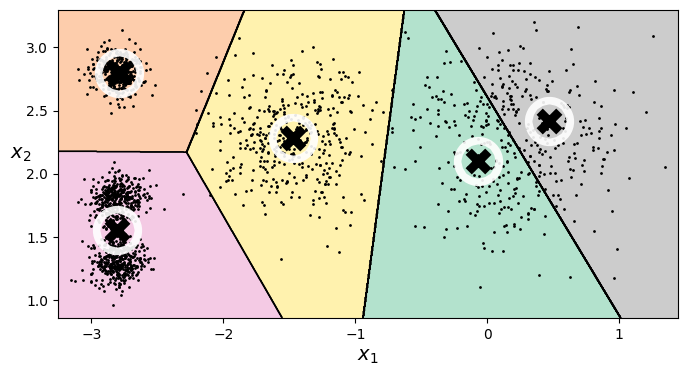

In [16]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=30,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=20, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

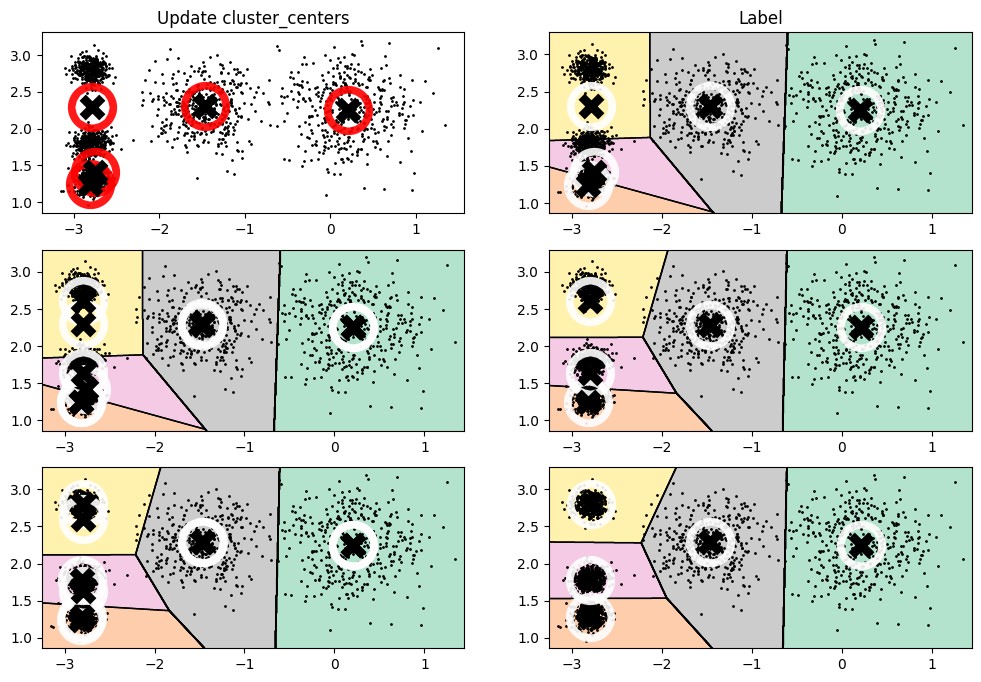

In [17]:
kmeans_iter1 = KMeans(n_clusters = 5,init = 'random',n_init = 1,max_iter=1,random_state=1)
kmeans_iter2 = KMeans(n_clusters = 5,init = 'random',n_init = 1,max_iter=2,random_state=1)
kmeans_iter3 = KMeans(n_clusters = 5,init = 'random',n_init = 1,max_iter=3,random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(12,8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='k')
plt.title('Update cluster_centers')

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X,show_xlabels=False, show_ylabels=False)
plt.title('Label')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X,show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_,)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_,)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X,show_xlabels=False, show_ylabels=False)

plt.show()

[[-2.8014751   1.5509905 ]
 [-2.17893163  2.55685297]
 [ 0.13957499  2.25090372]]
[[ 0.13957499  2.25090372]
 [-2.17893163  2.55685297]
 [-2.8014751   1.5509905 ]]


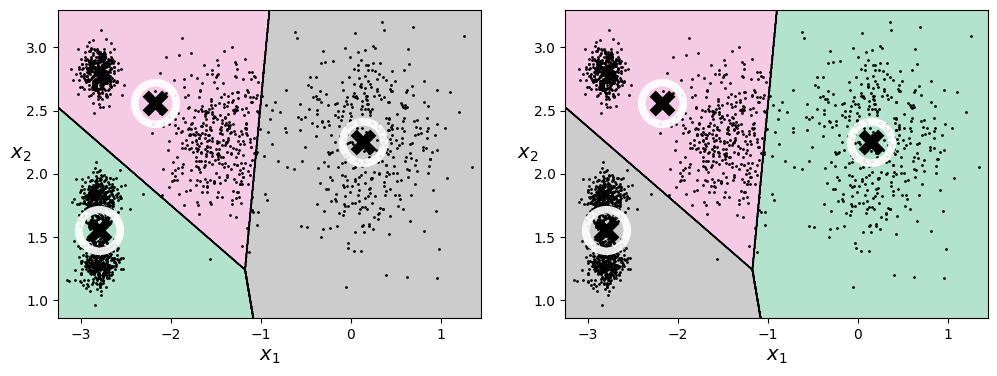

In [28]:
def plot_clusterer_comparison(c1,c2,X):
    c1.fit(X)
    c2.fit(X)
    print(c1.cluster_centers_)
    print(c2.cluster_centers_)
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_decision_boundaries(c1,X)
    plt.subplot(122)
    plot_decision_boundaries(c2,X)
    
c1 = KMeans(n_clusters=3, init='random', n_init=1, random_state=11)
c2 = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
plot_clusterer_comparison(c1,c2,X)

聚类器 1 的质心: [[ 9.12239104 -2.42822185]
 [ 0.39651146  3.36559083]
 [-1.84065524  6.990758  ]]
聚类器 2 的质心: [[-1.80003539  2.83253961]
 [-1.38293201  7.14350877]
 [ 3.61414142  1.07151741]]


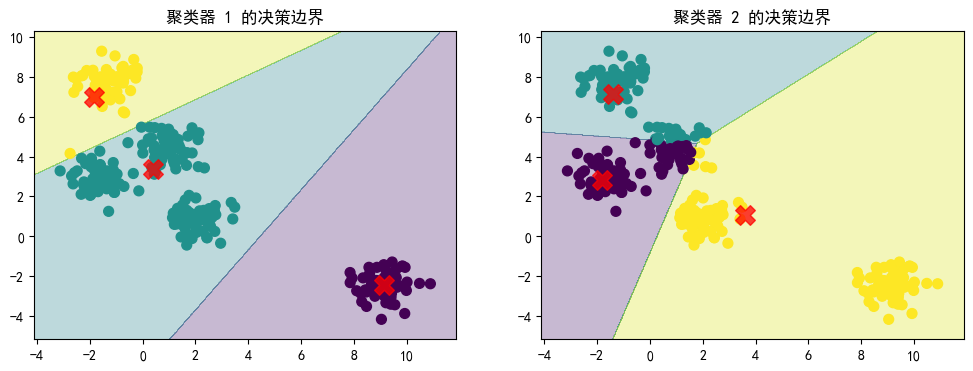

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# 设置字体为 SimHei
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 绘制决策边界的函数
def plot_decision_boundaries(clusterer, X):
    h = .02  # 网格的步长
    # 创建网格
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])

    # 将结果放入颜色图中
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)

    # 绘制质心为白色 X
    centers = clusterer.cluster_centers_
    plt.scatter(X[:, 0], X[:, 1], c=clusterer.labels_, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

# 比较两个聚类器的函数
def plot_clusterer_comparison(c1, c2, X):
    c1.fit(X)
    c2.fit(X)
    
    # 打印初始和最终质心
    print("聚类器 1 的质心:", c1.cluster_centers_)
    print("聚类器 2 的质心:", c2.cluster_centers_)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plot_decision_boundaries(c1, X)
    plt.title("聚类器 1 的决策边界")
    plt.subplot(122)
    plot_decision_boundaries(c2, X)
    plt.title("聚类器 2 的决策边界")
    plt.show()

# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# 创建两个 KMeans 聚类器
c1 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1, random_state=11)
c2 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1, random_state=42)

# 比较聚类器
plot_clusterer_comparison(c1, c2, X)

# default iterations 30 will yield same clustering no matter what initial centroids are, maybe KMeans algorithms has been developed

In [58]:
kmeans.inertia_

21735.388671875

In [46]:
X_distance = kmeans.transform(X)  # X has been changed during last cell generated by ChatGPT

In [47]:
X_distance

array([[12.43309496,  1.19369913, 14.54298514, 10.77865739,  8.28352108],
       [ 5.3307715 , 14.33542612,  0.77158799,  4.01249205,  7.73082847],
       [ 2.57852223, 10.83705674,  3.97161013,  0.45739796,  3.66679358],
       ...,
       [ 0.40434216, 12.02518556,  4.4911867 ,  2.69475803,  4.23464553],
       [ 5.16732316,  7.09381505,  7.6005433 ,  3.62475419,  1.59775456],
       [ 2.43510396, 10.37933677,  4.57652387,  0.88154979,  3.05809669]])

In [48]:
kmeans.labels_

array([1, 2, 3, 1, 0, 0, 4, 3, 4, 2, 1, 1, 3, 2, 2, 3, 3, 4, 1, 0, 4, 0,
       3, 1, 0, 3, 0, 4, 2, 0, 4, 1, 3, 1, 1, 2, 4, 2, 0, 4, 3, 0, 3, 3,
       1, 0, 4, 0, 1, 0, 0, 4, 0, 0, 1, 0, 4, 2, 2, 1, 0, 4, 0, 2, 2, 1,
       1, 2, 0, 1, 0, 4, 1, 1, 1, 1, 1, 2, 3, 4, 2, 2, 3, 1, 1, 2, 4, 4,
       4, 0, 2, 4, 4, 1, 0, 2, 3, 2, 2, 3, 1, 0, 4, 2, 4, 3, 0, 4, 3, 0,
       3, 2, 0, 4, 1, 4, 3, 1, 0, 4, 3, 2, 1, 2, 1, 0, 0, 4, 4, 2, 4, 2,
       1, 2, 2, 4, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 2, 3, 1, 2, 1, 3,
       1, 3, 0, 2, 1, 2, 0, 3, 2, 3, 3, 0, 3, 1, 2, 3, 4, 4, 3, 1, 4, 3,
       2, 2, 0, 4, 3, 0, 4, 3, 0, 2, 4, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 0,
       2, 4, 0, 1, 3, 2, 4, 2, 3, 1, 0, 2, 4, 1, 4, 0, 3, 3, 2, 0, 0, 0,
       4, 3, 1, 4, 4, 0, 0, 2, 3, 2, 2, 3, 3, 1, 3, 0, 0, 3, 1, 4, 2, 1,
       2, 4, 3, 4, 1, 1, 2, 1, 2, 2, 2, 4, 0, 4, 4, 0, 2, 4, 4, 1, 3, 3,
       2, 4, 2, 2, 3, 1, 3, 0, 4, 2, 0, 3, 4, 4, 4, 3, 1, 1, 4, 4, 3, 0,
       4, 0, 2, 2, 1, 4, 0, 0, 1, 1, 1, 0, 4, 3])

In [49]:
distance = X_distance[np.arange(len(X_distance)), kmeans.labels_]
inertia = np.sum(distance ** 2)

In [50]:
inertia

211.21561192615218

# Silhouette Coefficient


$$s(i) = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}$$
where a(i) is the average distance between sample i and other samples in this cluster, b(i) is the minumal average distance between sample i and others sample in other clusters (1 cluster, 1 average distance).
s(i) close 1, well clustering; 0, the sample is on the boundary; -1, should be clustered in the other cluster

# image segmentation

In [51]:
from matplotlib.image import imread
image = imread('ladybug.png')
image.shape

(533, 800, 3)

In [52]:
X = image.reshape(-1, 3)
kmeans = KMeans(random_state=42).fit(X)
kmeans.cluster_centers_

array([[0.02199069, 0.10830456, 0.00567974],
       [0.98304534, 0.93267906, 0.0255405 ],
       [0.2132627 , 0.38076016, 0.05517572],
       [0.6082821 , 0.6286249 , 0.38580635],
       [0.3667924 , 0.5195236 , 0.15321174],
       [0.09567662, 0.24869078, 0.01605229],
       [0.7651929 , 0.19927897, 0.04392379],
       [0.8761008 , 0.71743155, 0.03685827]], dtype=float32)

In [53]:
# every pixel place will just keep the color of its cluster centroid, that is segmentation
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(533, 800, 3)

In [54]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_cluster in n_colors:
    kmeans = KMeans(n_clusters = n_cluster,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

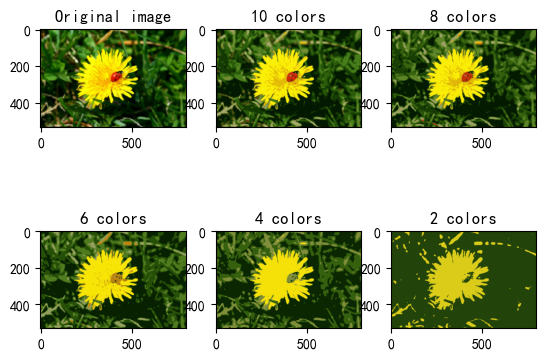

In [55]:
plt.subplot(231)
plt.imshow(image)
plt.title('Original image')

for idx, n_cluster in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title('{} colors'.format(n_cluster))

# Half-Supervised Learning

In [56]:
from sklearn.datasets import load_digits

X_digits,y_digits = load_digits(return_X_y = True)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_digits,y_digits,random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8266666666666667

In [59]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [60]:
X_digits_dist.shape

(1347, 50)

In [61]:
representative_digits_idx = np.argmin(X_digits_dist,axis=0)  # find the closest painting with each cluster centroid
X_representative_digits = X_train[representative_digits_idx]

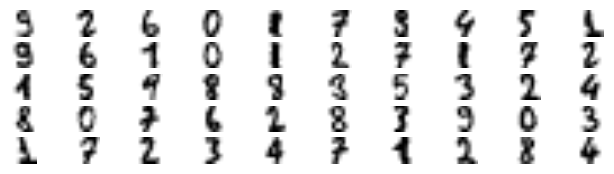

In [62]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [66]:
# manually assign labels
y_representative_digits = np.array([
    9, 2, 6, 0, 1, 7, 3, 4, 5, 1,
    9, 6, 1, 0, 1, 2, 7, 1, 7, 2,
    1, 5, 9, 8, 8, 3, 5, 3, 2, 4,
    8, 0, 7, 6, 2, 8, 3, 9, 0, 3,
    1, 7, 2, 3, 4, 7, 1, 2, 8, 4])

In [67]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9288888888888889

In [68]:
# what if we assign each manual label to all samples in each cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]
    
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

D:\code\DL4TAG\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.94

In [69]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster] #选择属于当前簇的所有样本
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) #排序找到前20个
    above_cutoff = (X_cluster_dist > cutoff_distance) # False True结果
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9288888888888889

# DBSCAN

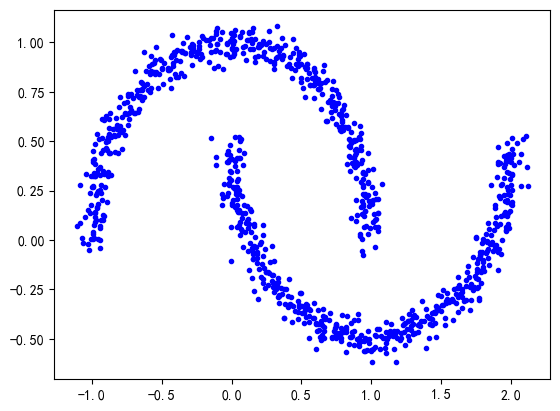

In [70]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
plt.plot(X[:,0],X[:,1],'b.')

In [71]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [72]:
dbscan.labels_[:10]  # -1 in DBSCAN represents the isolated point

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [73]:
dbscan2 = DBSCAN(eps = 0.2,min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.2)

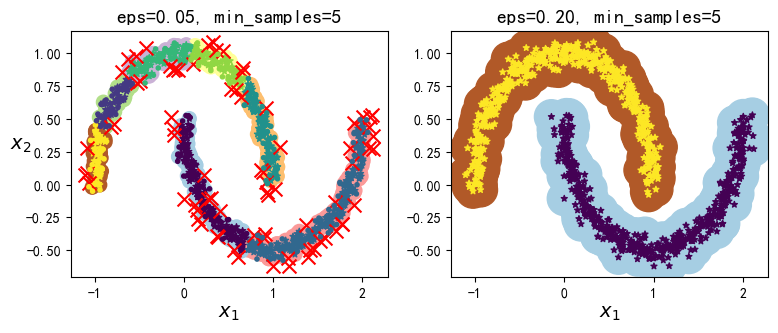

In [74]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft='off')
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()